In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.preprocessing.image import  ImageDataGenerator

In [3]:
tf.__version__

'2.8.2'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1503 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 377 images belonging to 2 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)


Epoch 1/20
47/47 [==============================] - 398s 9s/step - loss: 0.6148 - accuracy: 0.6627 - val_loss: 0.5088 - val_accuracy: 0.7825
Epoch 2/20
47/47 [==============================] - 19s 404ms/step - loss: 0.4542 - accuracy: 0.7891 - val_loss: 0.4807 - val_accuracy: 0.7878
Epoch 3/20
47/47 [==============================] - 19s 403ms/step - loss: 0.4258 - accuracy: 0.8057 - val_loss: 0.4996 - val_accuracy: 0.7772
Epoch 4/20
47/47 [==============================] - 19s 400ms/step - loss: 0.4052 - accuracy: 0.8164 - val_loss: 0.4514 - val_accuracy: 0.7745
Epoch 5/20
47/47 [==============================] - 19s 398ms/step - loss: 0.3745 - accuracy: 0.8224 - val_loss: 0.4213 - val_accuracy: 0.8302
Epoch 6/20
47/47 [==============================] - 19s 400ms/step - loss: 0.3595 - accuracy: 0.8390 - val_loss: 0.4404 - val_accuracy: 0.8302
Epoch 7/20
47/47 [==============================] - 19s 399ms/step - loss: 0.3347 - accuracy: 0.8510 - val_loss: 0.4505 - val_accuracy: 0.7798
E

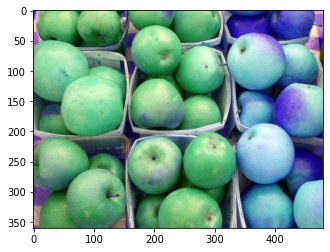

In [22]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/apple_944.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
image = cv2.imread('/content/drive/MyDrive/dataset/single_prediction/apple_944.jpg')
plt.imshow(image)
if result[0][0] == 0:
  prediction = 'apple'
else:
  prediction = 'mango'

In [23]:
print(prediction)

apple


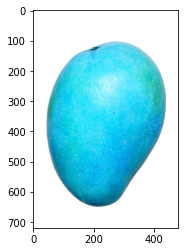

In [24]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/mango_07.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
image = cv2.imread('/content/drive/MyDrive/dataset/single_prediction/mango_07.jpg')
plt.imshow(image)
if result[0][0] == 0:
  prediction = 'apple'
else:
  prediction = 'mango'

In [25]:
print(prediction)

mango
